# Exercises

 For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

# Has the network latency gone up since we switched internet service providers?


##### Ho: The network latency has not gone up since we switched internet service providers.

##### Ha: The network latency has gone up since we switched internet service providers.

#### True neg: 
No change in latency. Correct inference. `P = 1-a`
#### True pos:
Latency has gone up. Correct inference. `P = 1 - b`

#### Type I error: 
Concluded that latency has gone up, when there is no change. `P=b`

#### Type II error:
Conclude there is no change in latency when there really is a change. `P=b`


# Is the website redesign any good?

##### Ho: The website redesign is not effective in grabbing customers' attention.

##### Ha: The website redesign effectively captures customers' attention.

#### True neg: 
No change in customer attention. Correct inference. `P = 1-a`

#### True pos:
Customer attention has gone up. Correct inference. `P = 1 - b`

#### Type I error: 
Concluded that customer attention has gone up, when there is no change. `P=b`

#### Type II error:
Conclude there is no change in customer attention when there really is a change. `P=b`

# Is our television ad driving more sales?


##### Ho: Our television ad does not reach enough people to drive more sales.

##### Ha: Our television ad reaches enough people to drive more sales.

#### True neg: 
No change in amount of people reached. Correct inference. `P = 1-a`

#### True pos:
Amount of people reached has gone up. Correct inference. `P = 1 - b`

#### Type I error: 
Concluded that the amount of people reached has gone up, when there is no change. `P=b`

#### Type II error:
Conclude there is no change in the amount of people reached when there really is a change. `P=b`

# T-Test

### Examples

In [16]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

df.study_strategy.fillna('None', inplace=True)

In [5]:
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,None,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='exam_score', ylabel='Density'>

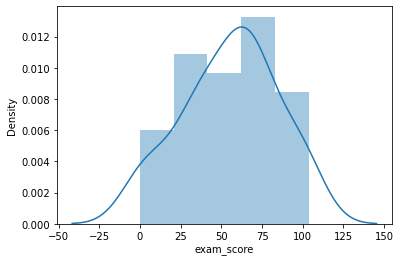

In [6]:
import seaborn as sns

sns.distplot(df.exam_score)

In [8]:
df.exam_score.mean(), df.exam_score.median()

(55.28336550715703, 58.35658448399582)

In [9]:
lefties = df[df.handedness == 'left']

μ = df.exam_score.mean()
xbar = lefties.exam_score.mean()
s = lefties.exam_score.std()
n = lefties.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))
t

0.49180552940467903

# Exercises

## 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

###### What?
avg time to sell houses for two different offices

Ho: There is no difference in average time to sell at two offices

Ha: There is difference in average time to sell at two offices

Significance level alpha = 0.05

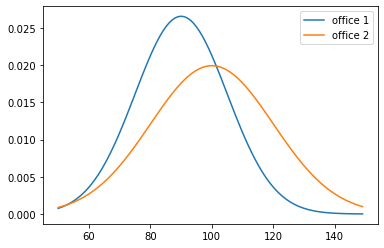

In [28]:
x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')

plt.legend()

In [10]:
sample1 = 40
mean1 = 90
std1 = 15

sample2 = 50
mean2 = 100
std2 = 20

alpha = .05

In [13]:
(40 - 1)*(15**2) + (50 - 1)*(20**2)

28375

In [14]:
28375/((40+50) - 2)

322.4431818181818

In [18]:
sp = sqrt(322.4431818181818)
sp

17.956702977389302

In [24]:
(sqrt((1/40) + (1/50)))

0.21213203435596426

In [25]:
0.21213203435596426*sp

3.809191932919393

In [29]:
t = (mean2 - mean1)/3.809191932919393
t

2.6252287036468456

In [34]:
df = (sample1 + sample2) -2
df

88

In [32]:
p = stats.t(df).sf(t) * 2
print(f'p = {p:.3}')

p = 0.0102


In [40]:
print(f'Because the p-value ({p}) is less than alpha value ({alpha}), we reject the null hypothesis')

Because the p-value (0.01020985244923939) is less than alpha value (0.05), we reject the null hypothesis


## 2. Load the mpg dataset and use it to answer the following questions:

- a.) Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- b.) Are compact cars more fuel-efficient than the average car?
- c.) Do manual cars get better gas mileage than automatic cars?

# a.

Ho: there is no difference in fuel-efficiency in cars from 2008 vs 1999

Ha: there is a difference in fuel-efficiency in cars from 2008 vs 1999

In [80]:
from pydataset import data
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [90]:
mpg['avg_mpg'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [94]:
cars_08 = mpg[mpg.year == 2008].avg_mpg
cars_99 = mpg[mpg.year == 1999].avg_mpg

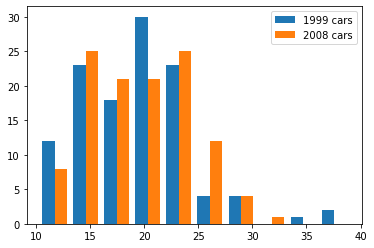

In [95]:
plt.hist([cars_99, cars_08], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

In [96]:
t, p = stats.ttest_ind(cars_2008, cars_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [98]:
print(f'Because the p-value ({p}) is greater than alpha value ({alpha}), we fail to reject the null hypothesis')

Because the p-value (0.7635345888327115) is greater than alpha value (0.05), we fail to reject the null hypothesis


# b. 

Ho: there is no difference in fuel-efficiency in compact cars and average cars

Ha: there is a difference in fuel-efficiency in compact cars and average cars

In [110]:
compact = mpg[mpg['class'] == 'compact'].avg_mpg
average = mpg.avg_mpg

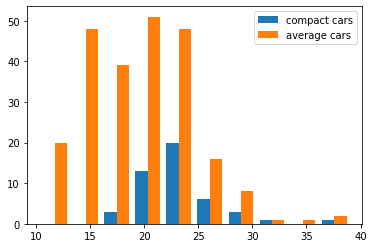

In [111]:
plt.hist([compact, average], label=["compact cars", "average cars"])
plt.legend(loc="upper right");

In [123]:
t, p = stats.ttest_ind(compact, average)
t, p/2, alpha

(5.193903224387407, 1.9888764369810984e-07, 0.05)

In [124]:
print(f'Because the p-value ({p}) is less than alpha value ({alpha}), we reject the null hypothesis')

Because the p-value (3.977752873962197e-07) is less than alpha value (0.05), we reject the null hypothesis


# c.

Ho: there is no difference in fuel-efficiency for manual cars and automatic cars

Ha: there is a difference in fuel-efficiency for manual cars and automatic cars

In [108]:
manual = mpg[mpg['trans'].str.startswith('m')].avg_mpg
auto = mpg[mpg['trans'].str.startswith('a')].avg_mpg

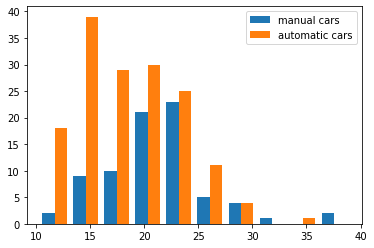

In [114]:
plt.hist([manual, auto], label=["manual cars", "automatic cars"])
plt.legend(loc="upper right");

In [126]:
t, p = stats.ttest_ind(manual, auto)
t, p

(4.652577547151351, 5.510464610044005e-06)

In [122]:
print(f'Because the p-value ({p}) is less than alpha value ({alpha}), we reject the null hypothesis')

Because the p-value (5.510464610044005e-06) is less than alpha value (0.05), we reject the null hypothesis
